start 2022-08-18 10:54:45.007492
[  5  15  25  35  45  55  65  75  85  95 105]
tropical not ot frac [       nan        nan        nan 1.         1.         0.875
 1.         0.81818182 0.75       0.08433735        nan]
tropical ot frac [       nan        nan        nan 0.         0.         0.
 0.         0.04545455 0.0625     0.56626506        nan]
trop NOT num [ 0.  0.  0.  3.  3.  7.  8. 18. 24. 14.  0.]
trop OT num [ 0.  0.  0.  0.  0.  0.  0.  1.  2. 94.  0.]
trop LOT num [ 0  0  0  0  0  1  0  3  6 58  0]
trop all num [  0.   0.   0.   3.   3.   8.   8.  22.  32. 166.   0.] 242.0
422 69 177
midlatitude NOT frac [1.         1.         1.         0.94339623 0.91666667 0.9122807
 0.81034483 0.78125    0.63       0.18181818        nan]
midlatitude OT frac [0.         0.         0.         0.         0.         0.01754386
 0.         0.03125    0.04       0.29665072        nan]
mid non OT [ 1 25 41 50 55 52 47 50 63 38  0]
mid  OT [ 0  0  0  0  0  1  0  2  4 62  0]
mid LOT [  0   0   

/tmp/ipykernel_185222/1992494396.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(fname,sep=', ',index_col=False)
/tmp/ipykernel_185222/1992494396.py:70: RuntimeWarning: invalid value encountered in true_divide
  Trop_NOT_frac=trop_NOT_num/trop_Allnum
/tmp/ipykernel_185222/1992494396.py:75: RuntimeWarning: invalid value encountered in true_divide
  p01=ax[0].plot(x,trop_OT_num/trop_Allnum,'gray',linewidth=2,marker='o',markersize=9)#,mfc='none')
/tmp/ipykernel_185222/1992494396.py:76: RuntimeWarning: invalid value encountered in true_divide
  p02=ax[0].plot(x,trop_LOT_num/trop_Allnum,'lightgray',linewidth=2,marker='o',markersize=9)#,mfc='none')
/tmp/ipykernel_185222/1992494396.py:82: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Mat

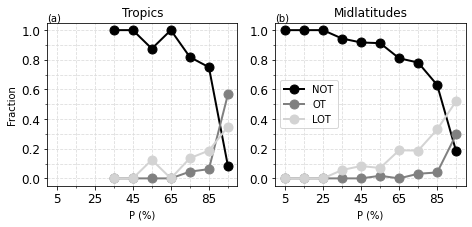

In [2]:
# this script is to extract the OT information, recording lat, min BT11, avg. BT11, \


import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats
from math import floor
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

print('start',datetime.now())
planck_c1=1.191042e8
planck_c2=1.4387752e4

fname='Aqua_OT_candidate_July_2018_hc.txt'

df=pd.read_csv(fname,sep=', ',index_col=False)
OTlat=df['lat']
OTflag=df['OTflag'] # 0 non OT, 1 LOT, 2 OT
OTprob=df['P']

#== to plot ===
Nx=11
trop_NOT_num=np.zeros((Nx),'f')
trop_OT_num =np.zeros((Nx),'f')
trop_LOT_num=np.zeros((Nx),'i')
mid_NOT_num=np.zeros((Nx),'i')
mid_OT_num =np.zeros((Nx),'i')
mid_LOT_num=np.zeros((Nx),'i')

Nrow=OTprob.shape[0]
for i in np.arange(Nrow):
    tpOTflag=OTflag[i]
    tpOTlat =OTlat[i]
    tpOTprob=OTprob[i]
    proba_scp=floor(tpOTprob/0.1)
    
    if abs(tpOTlat) < 25 :    
        if tpOTflag == 0:
            trop_NOT_num[proba_scp]=trop_NOT_num[proba_scp]+1
           
        if tpOTflag == 2:
            trop_OT_num[proba_scp] = trop_OT_num[proba_scp]+1            
                
        if tpOTflag == 1:
            trop_LOT_num[proba_scp]= trop_LOT_num[proba_scp]+1
   
    if abs(tpOTlat) >= 25 :    
        if tpOTflag == 0:
            mid_NOT_num[proba_scp]=mid_NOT_num[proba_scp]+1
             
        if tpOTflag == 2:
            mid_OT_num[proba_scp] = mid_OT_num[proba_scp]+1
                      
        if tpOTflag == 1:
            mid_LOT_num[proba_scp]= mid_LOT_num[proba_scp]+1

x=np.arange(Nx)
x=x*10+5

trop_OT_frac=np.zeros((Nx),'f')
trop_Allnum=trop_NOT_num+trop_OT_num+trop_LOT_num
Trop_NOT_frac=trop_NOT_num/trop_Allnum

fig, ax =plt.subplots(1,2,figsize=[7.5,3])

p00=ax[0].plot(x,Trop_NOT_frac,'black',linewidth=2,marker='o',markersize=9)#,mfc='none')
p01=ax[0].plot(x,trop_OT_num/trop_Allnum,'gray',linewidth=2,marker='o',markersize=9)#,mfc='none')
p02=ax[0].plot(x,trop_LOT_num/trop_Allnum,'lightgray',linewidth=2,marker='o',markersize=9)#,mfc='none')
ax[0].set_title('Tropics')
ax[0].set_xlabel('P (%)')
ax[0].set_ylabel('Fraction')
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].grid(b=True,which='both',linestyle='--',color='gainsboro')
ax[0].tick_params(labelsize=12)
ax[0].set_xticks([5,25,45,65,85,105])
ax[0].set_xlim([0,100])
ax[0].text(0.075,1.06,'(a)',fontsize=10)
#plt.show()
print(x)
print('tropical not ot frac',Trop_NOT_frac)
print('tropical ot frac',trop_OT_num/trop_Allnum)
print('trop NOT num',trop_NOT_num)
print('trop OT num',trop_OT_num)
print('trop LOT num',trop_LOT_num)
print('trop all num',trop_Allnum,np.sum(trop_Allnum))

print(sum(mid_NOT_num),sum(mid_OT_num),sum(mid_LOT_num))
mid_Allnum=mid_NOT_num+mid_OT_num+mid_LOT_num
print('midlatitude NOT frac',mid_NOT_num/mid_Allnum)
print('midlatitude OT frac',mid_OT_num/mid_Allnum)
p10=ax[1].plot(x,mid_NOT_num/mid_Allnum,'black',linewidth=2,marker='o',markersize=9, label='NOT')
p11=ax[1].plot(x,mid_OT_num/mid_Allnum,'gray',linewidth=2,marker='o',markersize=9, label='OT')
p12=ax[1].plot(x,mid_LOT_num/mid_Allnum,'lightgray',linewidth=2,marker='o',markersize=9, label='LOT')
plt.title('Midlatitudes')
print('mid non OT',mid_NOT_num)
print('mid  OT',mid_OT_num)
print('mid LOT',mid_LOT_num)
print('mid all num',mid_Allnum,np.sum(mid_Allnum))
ax[1].set_xlabel('P (%)')
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[1].grid(b=True,which='both',linestyle='--',color='gainsboro')
ax[1].tick_params(labelsize=12)
ax[1].set_xticks([5,25,45,65,85,105])
ax[1].set_xlim([0,100])
ax[1].text(0.075,1.06,'(b)',fontsize=10)
ax[1].legend()
plt.show()

In [5]:
print(np.arange(2))

[0 1]
